In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as snf

In [3]:
Airlines=pd.read_csv('Airlines+Data.csv')

In [4]:
Airlines.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [5]:
Airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
p=Airlines["Month"][0]
p[0:3]
Airlines["months"]=0
Airlines.head()

,Month,Passengers,months
0,Jan-95,112,0
1,Feb-95,118,0
2,Mar-95,132,0
3,Apr-95,129,0
4,May-95,121,0


In [7]:
for i in range(96):
    p=Airlines["Month"][i]
    Airlines["months"][i]=p[0:3]

<ipython-input-7-d62eeb441a77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airlines["months"][i]=p[0:3]
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
month_dummies=pd.DataFrame(pd.get_dummies(Airlines["months"]))
month_dummies=month_dummies.iloc[:,[4,3,7,0,8,6,5,1,11,10,9,2]]

In [9]:
Airlines1=pd.concat([Airlines,month_dummies],axis=1)
Airlines1["t"]=np.arange(1,97)
Airlines1["t_Squared"]=Airlines1["t"]*Airlines1["t"]
Airlines1["log_passengers"]=np.log(Airlines["Passengers"])

<AxesSubplot:>

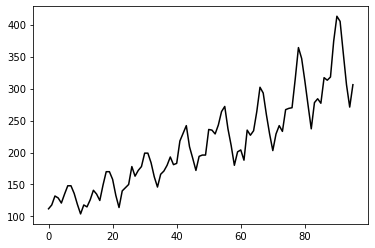

In [10]:
Airlines1.Passengers.plot(style="k")

In [11]:
Train=Airlines1.head(80)
Test=Airlines1.tail(16)
Test=Test.set_index(np.arange(1,17))

In [12]:
Lin_model=snf.ols("Passengers~t",data=Train).fit()
Lin_pred=pd.Series(Lin_model.predict(pd.DataFrame(Test["t"])))
Lin_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Lin_pred))**2))
Lin_rmse

47.54262406772677

In [13]:
Exp_model=snf.ols("log_passengers~t",data=Train).fit()
Exp_pred=pd.Series(Exp_model.predict(pd.DataFrame(Test["t"])))
Exp_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(Exp_pred)))**2))
Exp_rmse

43.79373939334308

In [14]:
Quad_model=snf.ols("Passengers~t+t_Squared",data=Train).fit()
Quad_pred=pd.Series(Quad_model.predict(pd.DataFrame(Test[["t","t_Squared"]])))
Quad_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Quad_pred))**2))
Quad_rmse

43.65440369584248

In [15]:
Add_sea=snf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit() 
Add_sea_pred=pd.Series(Add_sea.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]))
Add_sea_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Add_sea_pred))**2))

In [16]:
Add_sea_rmse

129.26647641443301

In [17]:
Add_sea_Quad=snf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t+t_Squared",data=Train).fit() 
Add_sea_Quad_pred=pd.Series(Add_sea_Quad.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","t","t_Squared"]]))
Add_sea_Quad_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Add_sea_Quad_pred))**2))
Add_sea_Quad_rmse

23.910983570103003

In [18]:
Mul_ad_sea=snf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()
Mul_ad_sea_pred=pd.Series(Mul_ad_sea.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]))
Mul_ad_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(Mul_ad_sea_pred)))**2))

In [19]:
Mul_ad_rmse

135.32648414621056

In [20]:
Mul_ad_Quad_sea=snf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t+t_Squared",data=Train).fit()
Mul_ad_Quad_sea_pred=pd.Series(Mul_ad_Quad_sea.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","t","t_Squared"]]))
Mul_ad_sea_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(Mul_ad_Quad_sea_pred)))**2))

In [21]:
Mul_ad_sea_rmse

23.08634854595413

In [25]:
data = {"MODEL":pd.Series(["Lin_rmse","Exp_rmse","Quad_rmse","Add_sea_rmse","Add_sea_Quad_rmse","Mul_ad_rmse","Mul_ad_sea_rmse"]),"RMSE_Values":pd.Series([Lin_rmse,Exp_rmse,Quad_rmse,Add_sea_rmse,Add_sea_Quad_rmse,Mul_ad_rmse,Mul_ad_sea_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,Lin_rmse,47.542624
1,Exp_rmse,43.793739
2,Quad_rmse,43.654404
3,Add_sea_rmse,129.266476
4,Add_sea_Quad_rmse,23.910984
5,Mul_ad_rmse,135.326484
6,Mul_ad_sea_rmse,23.086349


In [23]:
model_final=snf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t+t_Squared",data=Airlines1).fit()

In [24]:
model_final